In [30]:
%matplotlib widget
import os,sys
import csv
import copy
import math
import collections
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from clawpack import pyclaw
from clawpack import riemann
from IPython.display import HTML
import numpy as np
from scipy.integrate import simps, trapz
from scipy.interpolate import interp1d
from scipy import signal

%matplotlib widget
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use(['default'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
def fsin(x, n):
    y = math.sin((2*n-1)*x)/(2*n-1)
    return y

def fourier(x, N):
    y = 0
    for n in range(1,N+1):
        y += 4.0*math.sin((2*n-1)*x)/((2*n-1)*math.pi)
    return y

def series(xs, ys, N):
    Npoints = len(xs)
    for i in range(Npoints):
        x = xs[i]
        ys[i] = fourier(x,N)
    return ys

def exact(xs, ys):
    Npoints = len(xs)
    for i in range(Npoints):
        if xs[i] < 0 or xs[i] > math.pi:
            ys[i] = -1
        elif xs[i] > 0 and xs[i] < math.pi:
            ys[i] = 1
    return ys
    

In [81]:
Npoints = 300
xs = np.linspace(-0.5*math.pi, 2*math.pi, Npoints)


y2 = np.zeros(Npoints)
y2 = series(xs,y2, 2)


y5 = np.zeros(Npoints)
y5 = series(xs,y5, 5)

y10 = np.zeros(Npoints)
y10 = series(xs,y10, 10)

y50 = np.zeros(Npoints)
y50 = series(xs,y50, 50)

yexact = np.zeros(Npoints)
yexact = exact(xs,yexact)

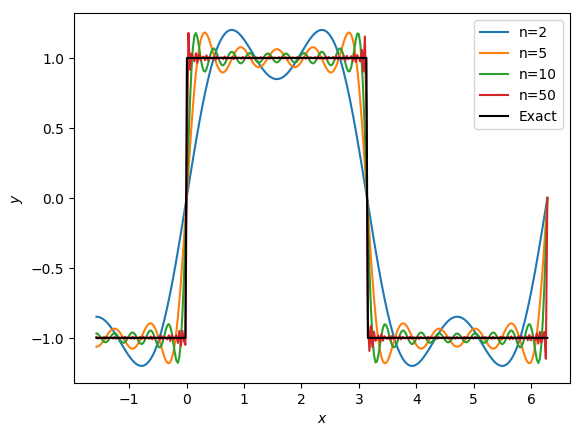

In [90]:
plt.style.use(['default'])
plt.plot(xs,y2, label='n=2')
plt.plot(xs,y5, label='n=5')
plt.plot(xs,y10, label='n=10')
plt.plot(xs,y50, label='n=50')

plt.plot(xs,yexact, 'k', label='Exact')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()